# MNIST classification

The MNIST database of grayscale handwritten digits, available from this page http://yann.lecun.com/exdb/mnist/, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data.

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## The MNIST Dataset

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [52]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Digit images are stored as 784-D vectors**. Each component represents the grayscale value of a pixel.

In [4]:
data = mnist['data']
data.shape

(70000, 784)

### Visualize MNIST image
We'll visutalize the **1st** sample image in the dataset. First reshape it into a 28-by-28 matrix array

Print out the label (or digit) of the chosen image

5


Show the image using **imshow()** with the aurgments **cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255)**

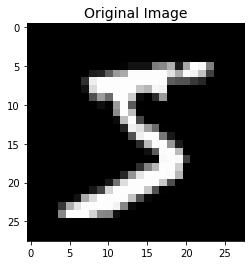

In [39]:
plt.figure(figsize=(8,4));
# use imshow below


## Logistic Regression on MNIST

Splitting original dataset into 10000 samples for testing and 60000 for training, set **random_state=101**

In [36]:
from sklearn.model_selection import train_test_split

### Training

Build a logistic regression model using default settings

Fit the logistic regression model on training data and print out the running time for training process. It'll take a long time. Ignore the warnings. 

/Users/Penghang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Penghang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


--- 3209.1297850608826 seconds ---


/Users/Penghang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Testing

Make predictions on test data and print out the classification report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1008
           1       0.95      0.97      0.96      1097
           2       0.91      0.89      0.90       989
           3       0.89      0.89      0.89      1046
           4       0.93      0.91      0.92       960
           5       0.90      0.86      0.88       913
           6       0.93      0.95      0.94      1005
           7       0.92      0.93      0.93      1068
           8       0.88      0.88      0.88       940
           9       0.89      0.89      0.89       974

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



## Dimensional reduction by PCA 

In [45]:
from sklearn.decomposition import PCA

Keep 100 principal components of the data (stored in vector form)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Transform MNIST data to its first 100 principal components using **transform()**

Print out the dimension of data array after PCA

(70000, 100)

### Visualize the processed image

You need to first transform the PCA data back to the original coordinate system under standard basis. Simply use the attribute **inverse_transform()** for this 

Plot the orignal image and processed image (by PCA) side by side

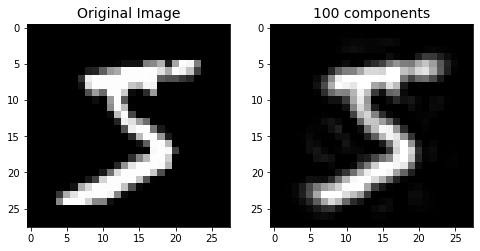

In [28]:
plt.figure(figsize=(8,4));

# Original Image


# 100 principal components


## Logistic Regression with PCA

Splitting processed PCA data into 10000 samples for testing and 60000 for training, set **random_state=101**

### Training 

Fit the logistic regression model on PCA data and print out the training time. Ignore the warnings.

/Users/Penghang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Penghang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


--- 376.8634259700775 seconds ---


As we can see, dimensional reduction via PCA dramatically speeds up the training.

### Testing

Make predictions on test data and print out the classification report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1008
           1       0.94      0.97      0.96      1097
           2       0.92      0.88      0.90       989
           3       0.88      0.88      0.88      1046
           4       0.91      0.92      0.91       960
           5       0.87      0.82      0.85       913
           6       0.93      0.96      0.94      1005
           7       0.92      0.94      0.93      1068
           8       0.88      0.86      0.87       940
           9       0.88      0.88      0.88       974

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

